In [2]:
from matplotlib import font_manager, rc
font_list = font_manager.findSystemFonts(fontpaths = None, fontext = 'ttf')

font_path = '/Users/krc/Library/Fonts/D2Coding-Ver1.3.2-20180524.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/krc/Downloads/train_V2.csv')
df = data.copy()

In [5]:
# matchType 평범한 게임, 결측지 제거
df = df.dropna()
name_list = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
df = df[df["matchType"].isin(name_list) == True]

In [6]:
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [7]:
# 결측치 확인
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [8]:
# 게임모드 순위 (FPP - 1인칭 시점 / TPP - 3인칭 시점 / Normal - 게임 중에 시점 변경 가능)
types = df.loc[:,"matchType"].value_counts().to_frame().reset_index()
types.columns = ["Type","count"]
types

,Type,count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536761
4,duo,313591
5,solo,181943


In [9]:
df.describe()[['DBNOs','assists','revives','teamKills']]

,DBNOs,assists,revives,teamKills
count,4.411698e+06,4.411698e+06,4.411698e+06,4.411698e+06
mean,6.541452e-01,2.287636e-01,1.642769e-01,2.363784e-02
std,1.124138e+00,5.704109e-01,4.708394e-01,1.660773e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.200000e+01,1.200000e+01,3.900000e+01,4.000000e+00


## DBNOs - 기절시킨 횟수 

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DBNOs', ylabel='count'>

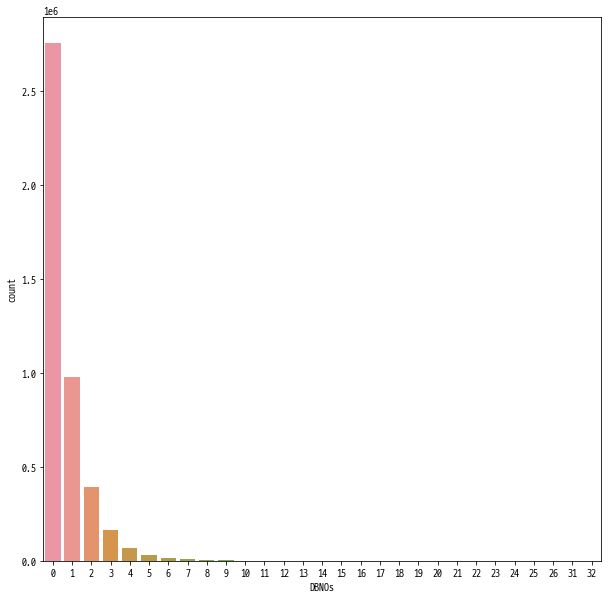

In [10]:
# DBNOs 확인
# 0은 헤드샷이거나 솔로 혹은 팀원 중 마지막에 살아있는 경우
plt.figure(figsize=(10,10))
sns.countplot(df.DBNOs)

In [11]:
# 평균값 확인
level_1q = df['DBNOs'].quantile(0.25)
level_3q = df['DBNOs'].quantile(0.75)
IQR = level_3q - level_1q
level_3q + (1.5 * IQR)

2.5

In [12]:
# 해당값 확인
df.DBNOs.unique()

array([ 0,  1,  6,  4,  3,  2,  5, 10,  8,  7,  9, 13, 12, 11, 24, 14, 15,
       21, 17, 18, 16, 20, 19, 25, 31, 22, 26, 23, 32])

In [13]:
# 헤드샷 26번 가능한가?
df[df.DBNOs >= 32]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3840888,7614924933b454,7de402ea23a8ef,59e23ee8543fd2,7,19,3796.0,32,26,4,1,...,0,4586.0,0,12.48,0,0,4485.0,6,1515,1.0


In [14]:
df.matchType[df.DBNOs == 32]

3840888    squad
Name: matchType, dtype: object

In [15]:
df[df.groupId == '7de402ea23a8ef'] 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1525264,9af1e014b50230,7de402ea23a8ef,59e23ee8543fd2,1,9,760.2,3,2,4,3,...,1,4347.0,0,17.24,0,0,2934.0,7,1568,1.0
3669907,19a96f0169f6c8,7de402ea23a8ef,59e23ee8543fd2,3,6,386.6,2,3,8,2,...,3,4139.0,0,21.27,0,0,3379.0,4,1497,1.0
3840888,7614924933b454,7de402ea23a8ef,59e23ee8543fd2,7,19,3796.0,32,26,4,1,...,0,4586.0,0,12.48,0,0,4485.0,6,1515,1.0


In [16]:
df.loc[df['DBNOs'] > df['DBNOs'].quantile(0.99)].DBNOs.value_counts()

6     14676
7      7059
8      3519
9      1818
10      977
11      531
12      350
13      188
14      112
15       78
16       49
17       41
18       25
19       14
20       12
21        8
25        4
22        3
24        2
26        2
23        2
31        1
32        1
Name: DBNOs, dtype: int64

In [17]:
# 상위 99% 벗어나는 데이터 
# df.loc[df['DBNOs'] > df['DBNOs'].quantile(0.99)] = 6 <- 이상치 6으로 다 합치는 코드 
df.loc[df['DBNOs'] > df['DBNOs'].quantile(0.99)].DBNOs.value_counts()

6     14676
7      7059
8      3519
9      1818
10      977
11      531
12      350
13      188
14      112
15       78
16       49
17       41
18       25
19       14
20       12
21        8
25        4
22        3
24        2
26        2
23        2
31        1
32        1
Name: DBNOs, dtype: int64

In [18]:
# remove outliers
df.drop(df[df['DBNOs'] > 6].index, inplace= True)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DBNOs', ylabel='count'>

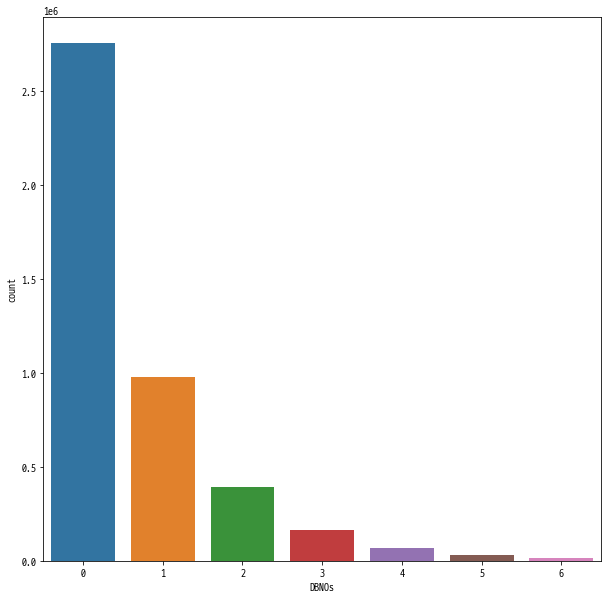

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df.DBNOs)

## assists - 상대방을 죽이는걸 도왔을 때, 직접적인 가해가 있어야 스코어가 오른다.  
- assists가 많을수록 winners될 확률이 높다.
- 5 ~ assist : rare
- 10 ~ ???? : cheater ? 
- more asissts -> teammate killed = team wins or strong

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


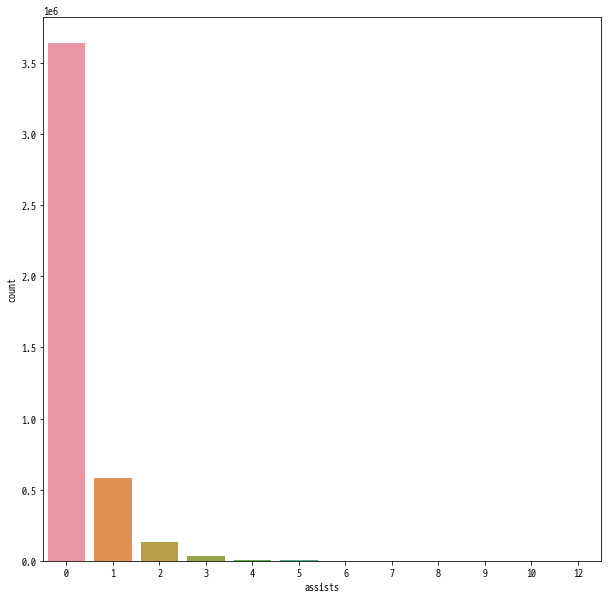

In [20]:
# assists  확인
plt.figure(figsize=(10,10))
sns.countplot(df.assists)
plt.show()

In [21]:
# solo 이상치 확인
# R = df[df.matchType == 'solo']
# plt.figure(figsize=(10,10))
# sns.countplot(R.assists)
# plt.show()

In [22]:
# duo, squad 이상치 확인
# R = df[df.matchType != 'solo']
# plt.figure(figsize=(10,10))
# sns.countplot(R.assists)
# plt.show()

In [23]:
# V = df[df.matchType == 'solo']
# V.assists.value_counts()

In [24]:
# R = df[df.matchType != 'solo']
# R.assists.value_counts()

In [25]:
# 해당값 확인
df.assists.unique()

array([ 0,  1,  3,  2,  4,  6,  5,  7,  8,  9, 12, 10])

In [26]:
df[df.assists == 12]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1965599,845ace028edf6b,81f2a6bdfe7fdb,5bd37757447283,12,7,808.7,1,2,4,3,...,1,523.6,0,0.0,0,0,3066.0,4,0,0.9615


In [27]:
# 스쿼드라 12번 충분히 가능하다고 판단 / 이상치 제거 x
df.matchType[df.groupId == '81f2a6bdfe7fdb']

1965599    squad-fpp
2360932    squad-fpp
2626270    squad-fpp
Name: matchType, dtype: object

## revives - 팀원 소생시킨 횟수, 기절상태가 될 때 살릴 수 있다. 

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revives', ylabel='count'>

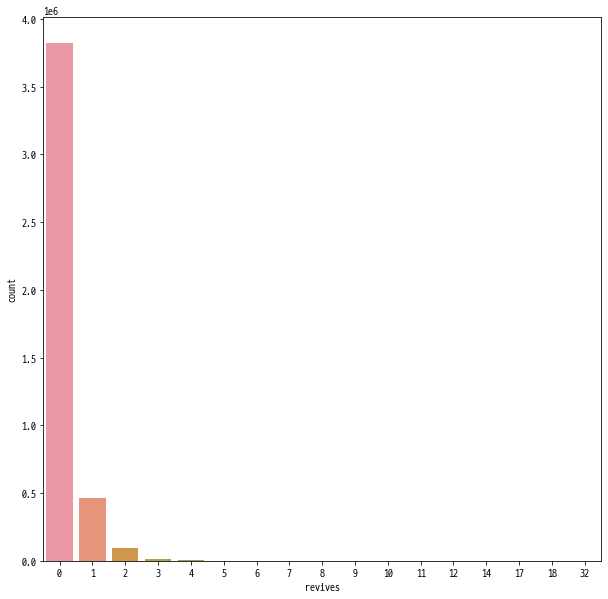

In [28]:
# revives 확인
plt.figure(figsize=(10,10))
sns.countplot(df.revives)

In [29]:
# 해당값 확인
df.revives.unique()

array([ 0,  1,  3,  2,  4,  5,  6,  9,  7,  8, 17, 11, 18, 14, 12, 10, 32])

In [30]:
df[df.revives >= 39]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [31]:
df.matchType[df.revives >= 39]

Series([], Name: matchType, dtype: object)

In [32]:
# 상위 99% 벗어나는 데이터 
df.loc[df['revives'] > df['revives'].quantile(0.99)].revives.value_counts()

3     16490
4      2863
5       519
6        92
7        30
8        12
9         4
11        4
14        4
10        3
17        1
18        1
12        1
32        1
Name: revives, dtype: int64

In [33]:
df.revives.value_counts()

0     3822633
1      461626
2       92618
3       16490
4        2863
5         519
6          92
7          30
8          12
9           4
11          4
14          4
10          3
17          1
18          1
12          1
32          1
Name: revives, dtype: int64

In [34]:
# df.loc[df['revives'] > df['revives'].quantile(0.99)] 

In [35]:
# remove outliers
#df.loc[df.revives >= 4,'revives'] = 4
df.drop(df[df['revives'] > 3].index, inplace= True)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revives', ylabel='count'>

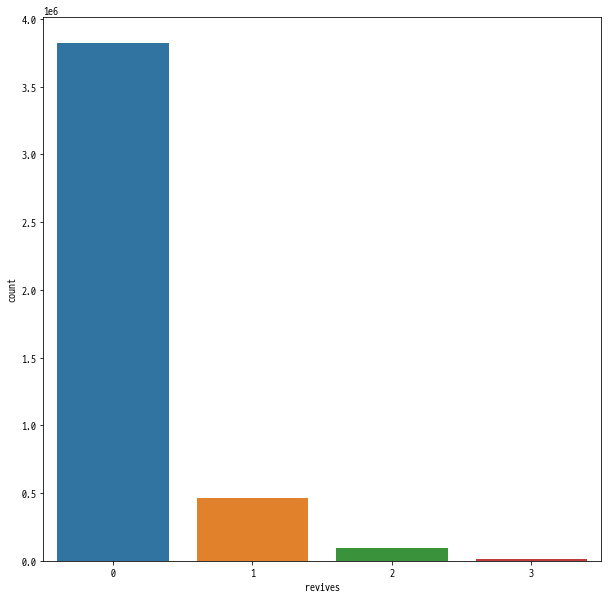

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(df.revives)

## teamkills - 팀원 죽인 횟수 (Drop)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='teamKills', ylabel='count'>

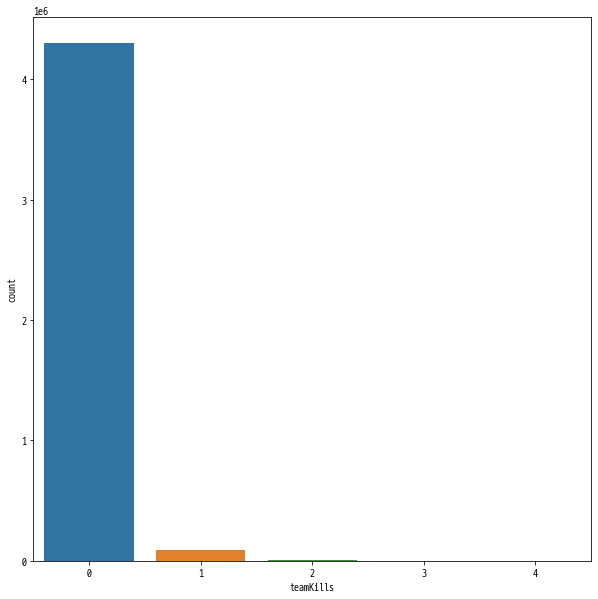

In [37]:
# teamKills 확인 
plt.figure(figsize=(10,10))
sns.countplot(df.teamKills)

In [38]:
# 해당값 확인
df.teamKills.unique()

array([0, 1, 2, 3, 4])

In [39]:
# solo인 경우 teamKills
V = df[df.matchType == 'solo']
V.teamKills.value_counts()

0    179215
1      2728
Name: teamKills, dtype: int64

In [40]:
# duo, squad 경우 teamKills
R = df[df.matchType != 'solo']
R.teamKills.value_counts()

0    4119550
1      83986
2       7031
3        786
4         71
Name: teamKills, dtype: int64

In [41]:
# 팀킬 3,4번한 사람들의 연관성 X (팀킬을 꾸준히 하는지 확인하려했는데 겹치는 Id가 없음 )
R = df[df.matchType != 'solo']
R[(R.teamKills == 3) | (R.teamKills == 4)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
939,b9d12e698bbecc,12e4e0f11b9b26,c78603d9ea8e3d,1,1,26.18,2,0,1,70,...,0,2312.0,0,0.0,3,0,609.90,7,0,0.2308
1979,2fd411ab25fc89,25226091b29ec0,838cb29103410a,0,0,65.00,2,0,0,96,...,0,0.0,0,0.0,3,0,53.82,0,1514,0.0000
7259,bb8858aefdb39b,6497251ef13d14,681b7e6ea05b36,0,0,200.00,5,2,0,14,...,0,259.2,0,0.0,3,0,177.30,0,0,0.1200
18553,a9fd4501bd914f,6b37becdd69468,932490f1044da1,0,0,313.00,3,0,0,62,...,0,0.0,0,0.0,4,0,372.20,3,1493,0.3793
20216,9640f91ccec58d,e46f8d4a48207c,a5791383b5f1c6,0,0,474.70,4,0,0,20,...,0,0.0,0,0.0,3,0,185.20,2,1580,0.0345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4424601,2ba5f084f5d51b,de43dea51983eb,582322ece6a6d3,2,0,191.90,3,0,0,64,...,0,0.0,0,0.0,3,0,1059.00,5,0,0.2963
4426217,ab8983981c2019,89ec5c012d0b4f,cca6455e350a3d,0,2,0.00,0,0,5,71,...,0,261.8,0,0.0,3,1,900.00,3,0,0.2069
4427777,b4984fc895d203,a2f0a1a24b89dc,53b544b4920a35,0,1,453.50,3,0,1,24,...,0,0.0,0,0.0,3,0,1070.00,3,1394,0.4848
4432043,208f441ec8f933,0906542c4beb26,ca64f6298e6b43,0,3,11.61,3,0,1,70,...,0,0.0,0,0.0,3,0,711.40,2,0,0.2000


/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


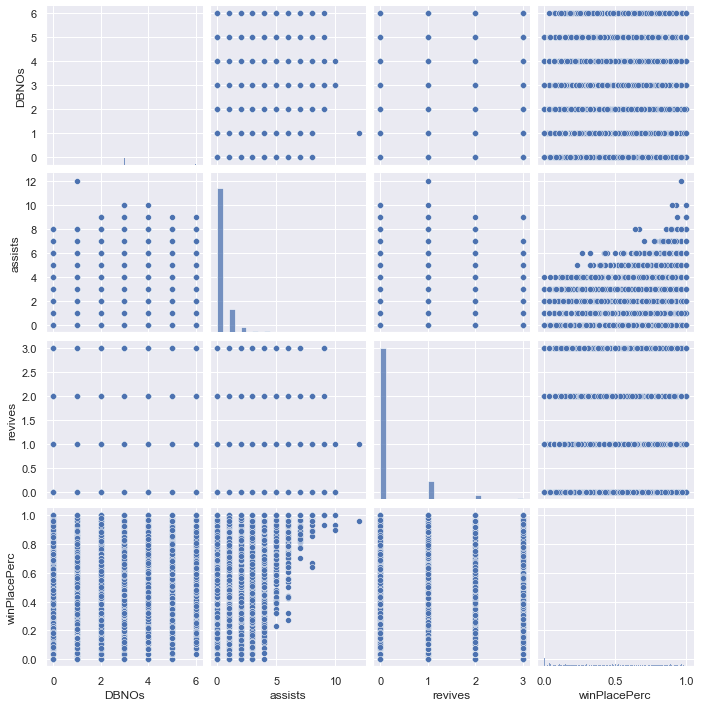

In [42]:
# 각 컬럼들의 관계 
sns.set()
cols = ['DBNOs','assists','revives','winPlacePerc']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [43]:
new_df = df[['DBNOs','assists','revives','winPlacePerc']]

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_5783/3794601466.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


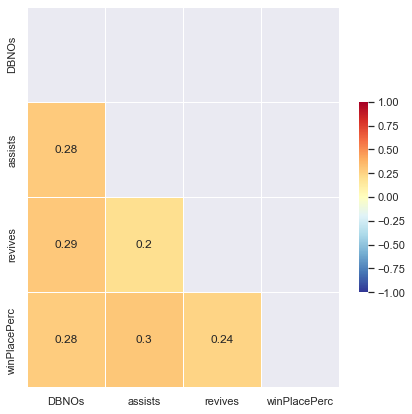

In [44]:
# teamkills를 제외한 나머지 3개는 상관관계가 높다고 판단. teamkills는 drop
corr = new_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값 표시
            mask=mask,      # 표시하지 않을 마스크 부분 지정
            linewidths=.5,  # 경계면 실선으로 구분
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           ) 
plt.show()

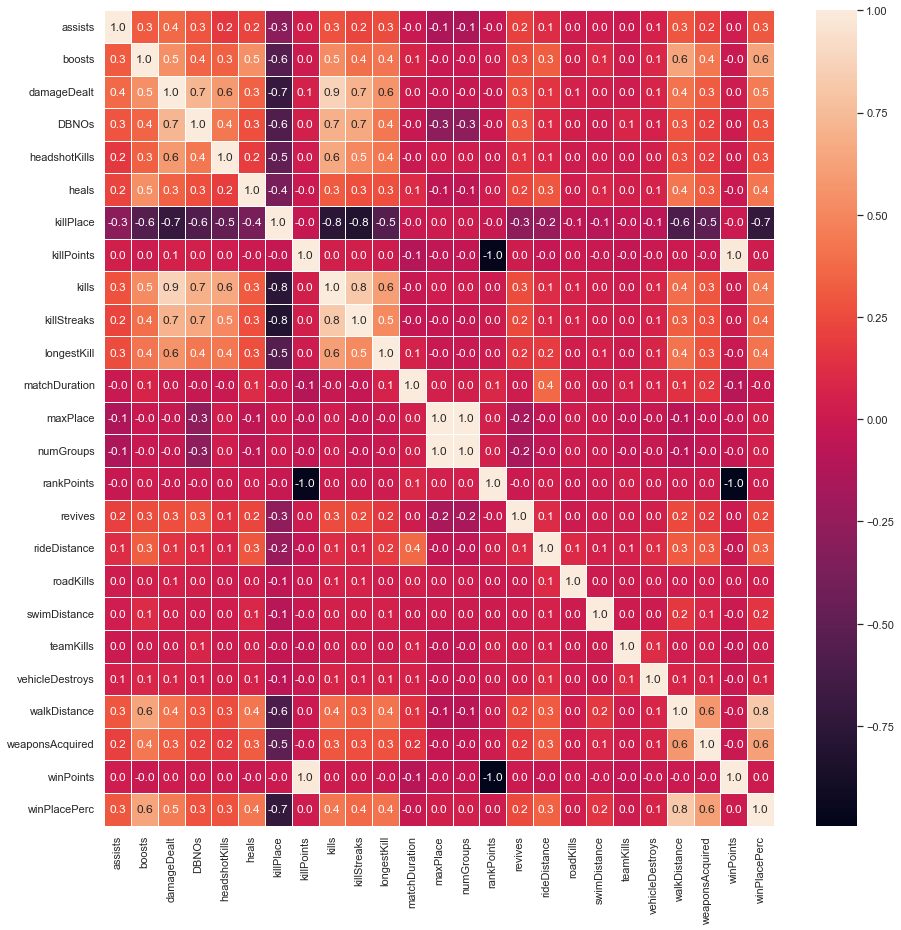

In [45]:
# 전체 상관계수 높은거 파악
plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

In [46]:
# teamkills drop 
# df.drop(columns=['teamKills','   ', '    ']) -> 여러개 drop할 때 
df=df.drop(['teamKills'],axis=1)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


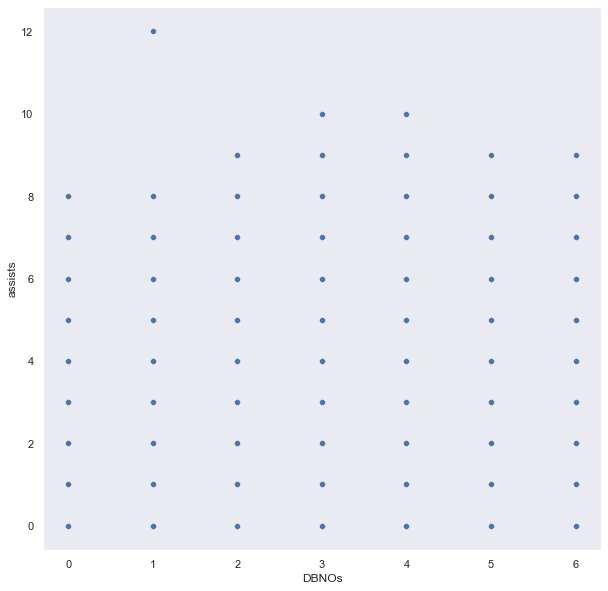

In [58]:
# 연관이 없다.
plt.figure(figsize = (10, 10))
sns.scatterplot(df["DBNOs"], df["assists"])
plt.grid()
plt.show()

## solo -> assists, DBNOs, revives X

## DBNOs EDA
- kills 와의 관계

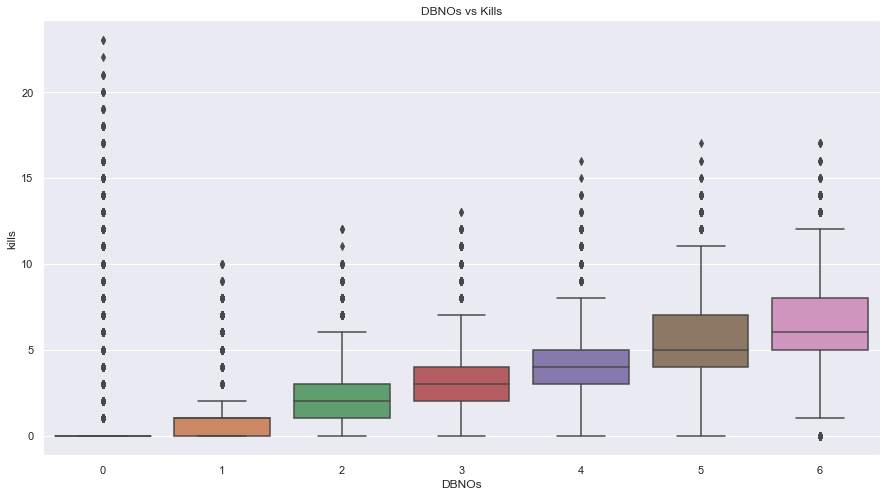

In [48]:
# DBNOs,Kills 상관관계 높음
# 보통 기절시키면 kill까지도 연결된다. DBNOs 없이 킬 점수가 높은 경우 headshot,vechicle explosion 이다.
plt.figure(figsize=(15,8))
ax2 = sns.boxplot(x="DBNOs",y="kills", data = df)
ax2.set_title("DBNOs vs Kills")
plt.show()

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


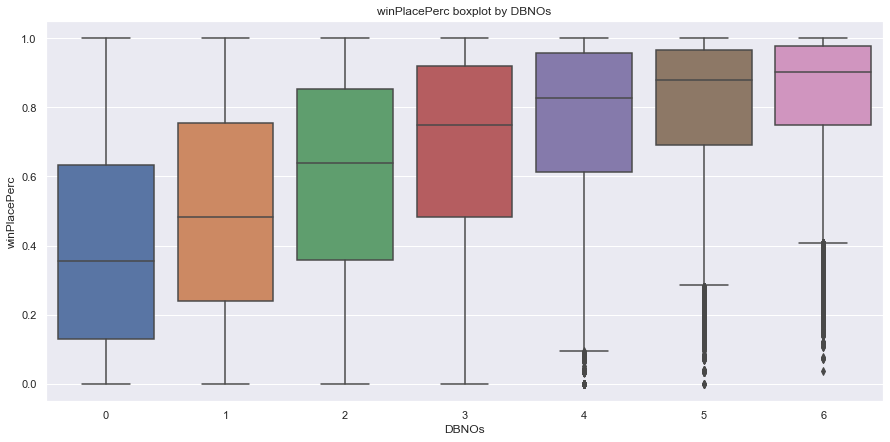

In [49]:
tt = df[df['matchType'].str.contains('solo') == False]
def bplot(df, col1, col2):
    plt.figure(figsize=(15, 7))
    sns.boxplot(col1, col2, data=df).set(title = f'{col2} boxplot by {col1}')
bplot(tt, 'DBNOs', 'winPlacePerc')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'DBNOs 횟수에 따른 winplaceperc ')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from cu

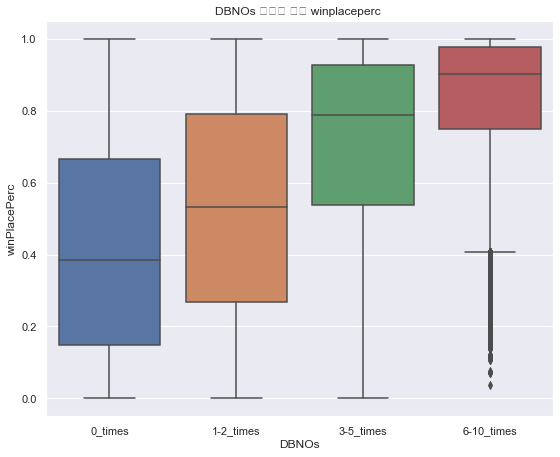

In [50]:
# DBNOs 횟수에 따른 winplaceperc 
plt.subplots(figsize=(20,16))
plt.subplot(2,2,1)
DBNOS = pd.cut(df['DBNOs'], [-1, 0, 2, 5, 10], 
               labels=['0_times','1-2_times', '3-5_times', '6-10_times'])
ax1=sns.boxplot(DBNOS,df['winPlacePerc'])
plt.title('DBNOs 횟수에 따른 winplaceperc ')

In [51]:
# Player group -> In solo no group, in duo minimum 50 group and in squad (25 * 4) minimum 25 group
solo_game = df[df["numGroups"] > 50]
solo = len(solo_game)

duo_game = df[(df["numGroups"] > 25) & (df["numGroups"] <= 50)]
duo = len(duo_game)

squad_game = df[df["numGroups"] <= 25]
squad = len(squad_game)

Text(4, 0.39, 'squad-DBNOs vs winPlacePerc')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


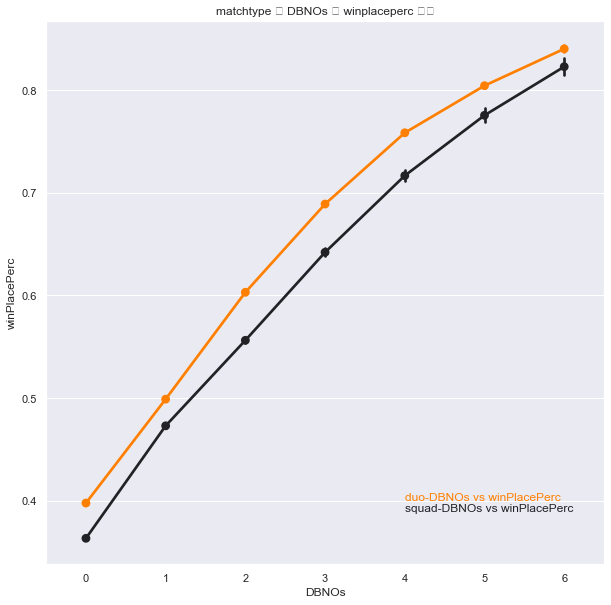

In [52]:
# duo일 때가 더 높다. 
plt.subplots(figsize=(10,10))
plt.title('matchtype 별 DBNOs 와 winplaceperc 관계')
sns.pointplot(x=duo_game["DBNOs"], y=duo_game["winPlacePerc"], color="#ff8000")
plt.text(4,0.4, "duo-DBNOs vs winPlacePerc", color="#ff8000")
sns.pointplot(x=squad_game["DBNOs"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(4,0.39, "squad-DBNOs vs winPlacePerc", color="#212126")

## assists EDA
- winplaceperc 관계

(-0.5, 11.5, 0.0, 1.0)

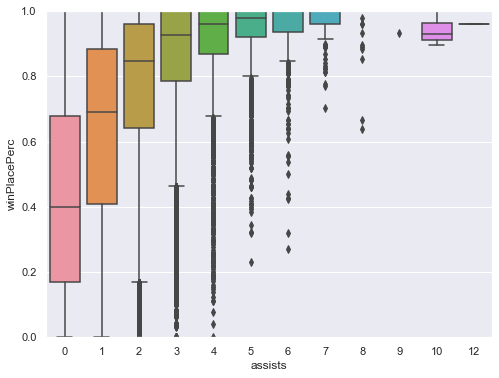

In [53]:
# assists 와 winplaceperc 관계  
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='assists', y="winPlacePerc", data=df)
fig.axis(ymin=0, ymax=1)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


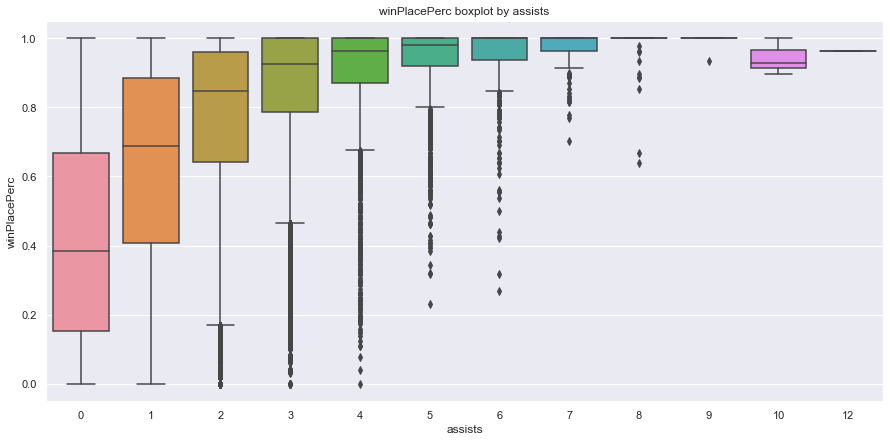

In [54]:
tt = df[df['matchType'].str.contains('solo') == False]
def bplot(df, col1, col2):
    plt.figure(figsize=(15, 7))
    sns.boxplot(col1, col2, data=df).set(title = f'{col2} boxplot by {col1}')
bplot(tt, 'assists', 'winPlacePerc')

## revives EDA
- winplaceperc와의 관계 

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'revives 횟수에 따른 winplaceperc')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from cu

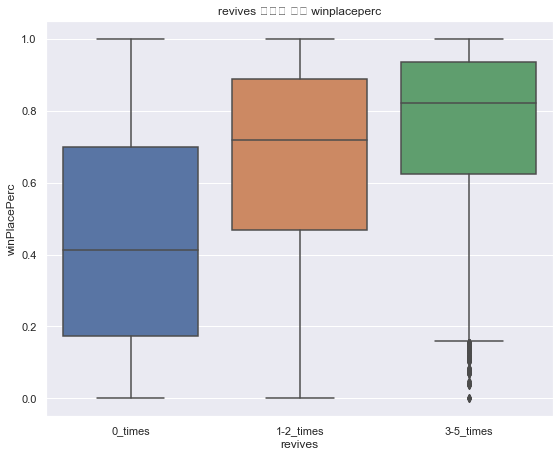

In [55]:
# revives 횟수에 따른 winplaceperc 
plt.subplots(figsize=(20,16))
plt.subplot(2,2,2)
Revives = pd.cut(df['revives'], [-1, 0, 2, 5], 
               labels=['0_times','1-2_times', '3-5_times'])

sns.boxplot(Revives,df['winPlacePerc'])
plt.title('revives 횟수에 따른 winplaceperc')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


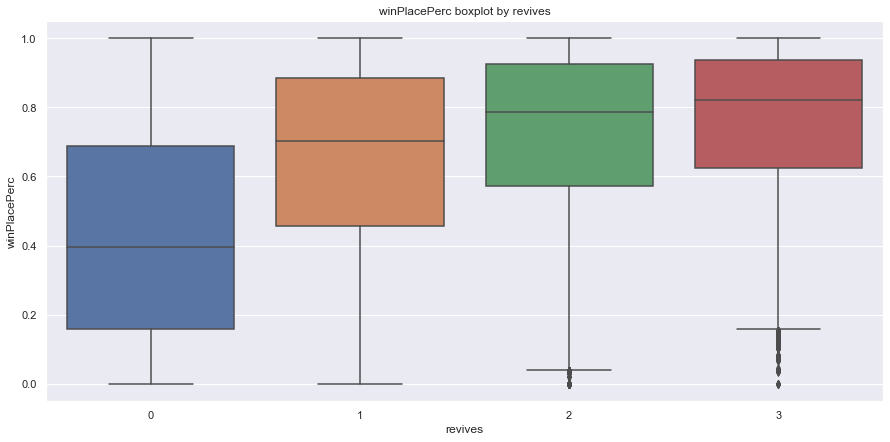

In [56]:
tt = df[df['matchType'].str.contains('solo') == False]
def bplot(df, col1, col2):
    plt.figure(figsize=(15, 7))
    sns.boxplot(col1, col2, data=df).set(title = f'{col2} boxplot by {col1}')
bplot(tt, 'revives', 'winPlacePerc')

Text(2, 0.39, 'squad-revives vs winPlacePerc')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


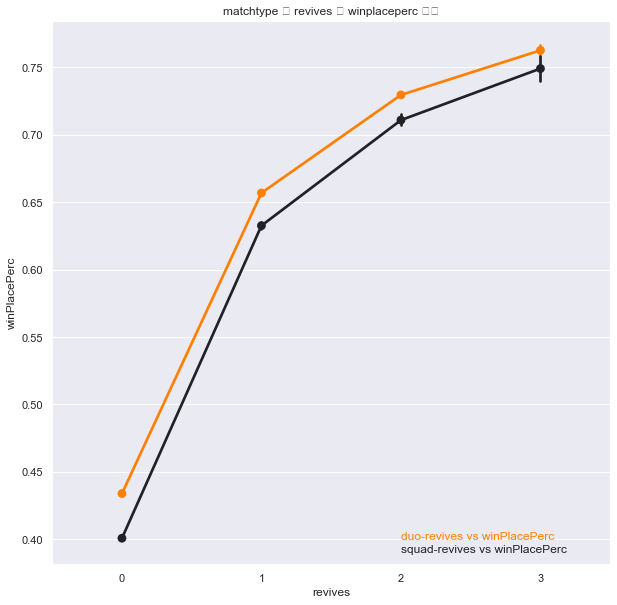

In [57]:
# 확인해보니 4 이상이면 그래프가 이상해서 3 이상 이상치 제거 
plt.subplots(figsize=(10,10))
plt.title('matchtype 별 revives 와 winplaceperc 관계')
sns.pointplot(x=duo_game["revives"], y=duo_game["winPlacePerc"], color="#ff8000")
plt.text(2,0.4, "duo-revives vs winPlacePerc", color="#ff8000")
sns.pointplot(x=squad_game["revives"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(2,0.39, "squad-revives vs winPlacePerc", color="#212126")